## Baseline Model 2 – Decision Tree Classifier

This notebook implements a **Decision Tree Classifier** to predict `Health_Score`
from the preprocessed plant dataset. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
)
import os

plt.style.use("seaborn-v0_8-darkgrid")
RANDOM_STATE = 42

In [2]:
train_path = "../data/training_preprocessed_plant_data.csv"
test_path  = "../data/testing_preprocessed_plant_data.csv"

train_df = pd.read_csv(train_path)
test_df  = pd.read_csv(test_path)

X_train = train_df.drop("Health_Score", axis=1)
y_train = train_df["Health_Score"]

X_test = test_df.drop("Health_Score", axis=1)
y_test = test_df["Health_Score"]

print("Training:", X_train.shape, "Testing:", X_test.shape)

Training: (700, 25) Testing: (300, 25)


In [3]:
# baseline tree (no heavy tuning)
dt_clf = DecisionTreeClassifier(
    criterion="entropy",
    max_depth=6,
    min_samples_leaf=5,
    class_weight="balanced",
    random_state=42
)

dt_clf.fit(X_train, y_train)
y_pred = dt_clf.predict(X_test)

print("✅ Training complete.")

✅ Training complete.


In [4]:
# --- Compute RMSE for Decision Tree ---
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"✅ RMSE: {rmse:.4f}")

# --- Save classification metrics (with RMSE) ---
report_dict = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()

# Add RMSE row
report_df.loc["RMSE"] = {
    "precision": np.nan,
    "recall": np.nan,
    "f1-score": np.nan,
    "support": rmse
}

# Save metrics file
metrics_path = "../results/metrics/decision_tree_metrics.csv"
report_df.to_csv(metrics_path, index=True)
print(f"✅ Metrics (with RMSE) saved to: {metrics_path}")

✅ RMSE: 1.8046
✅ Metrics (with RMSE) saved to: ../results/metrics/decision_tree_metrics.csv


In [5]:
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")

report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
display(report_df.head())

os.makedirs("../results/metrics", exist_ok=True)
report_df.to_csv("../results/metrics/decision_tree_metrics.csv")

Accuracy: 0.1867


,precision,recall,f1-score,support
1,0.187500,0.111111,0.139535,54.0
2,0.193548,0.173913,0.183206,69.0
3,0.137097,0.326923,0.193182,52.0
4,0.245902,0.245902,0.245902,61.0
5,0.285714,0.093750,0.141176,64.0


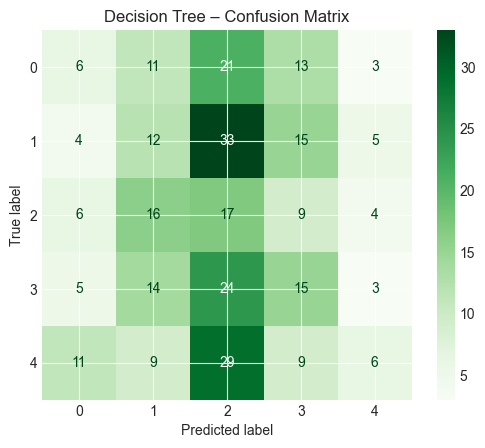

/var/folders/rg/28zpb0y11579_2__g4hmp5r40000gn/T/ipykernel_42247/36480399.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=importances.index, palette="viridis")


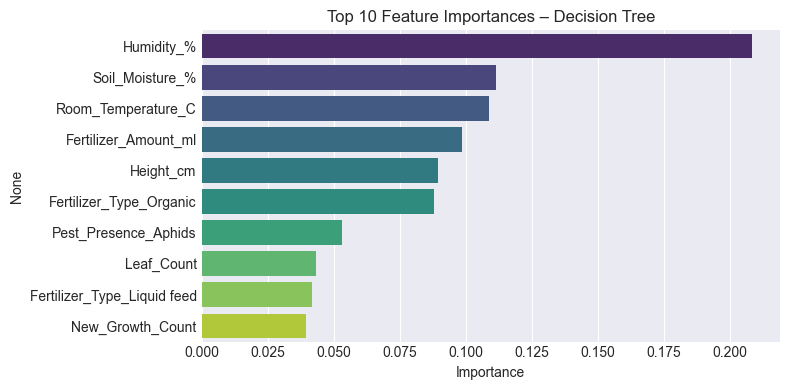

In [6]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Greens", values_format="d")
plt.title("Decision Tree – Confusion Matrix")
os.makedirs("../results/figures", exist_ok=True)
plt.savefig("../results/figures/decision_tree_confusion_matrix.png", bbox_inches="tight")
plt.show()

# Feature Importance
importances = pd.Series(dt_clf.feature_importances_, index=X_train.columns)
importances = importances.sort_values(ascending=False).head(10)

plt.figure(figsize=(8,4))
sns.barplot(x=importances, y=importances.index, palette="viridis")
plt.title("Top 10 Feature Importances – Decision Tree")
plt.xlabel("Importance")
plt.tight_layout()
plt.savefig("../results/figures/decision_tree_feature_importance.png", bbox_inches="tight")
plt.show()

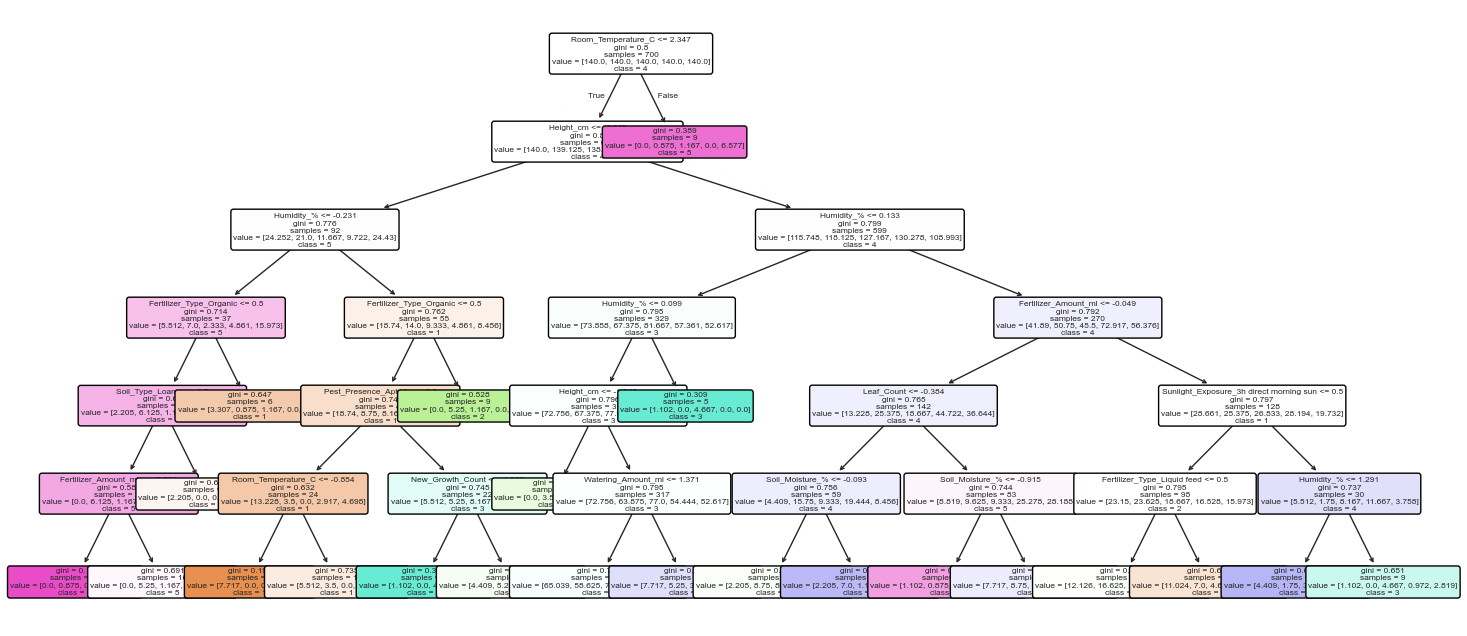

In [7]:
plt.figure(figsize=(18,8))
plot_tree(dt_clf, feature_names=X_train.columns, class_names=[str(i) for i in sorted(y_train.unique())],
          filled=True, rounded=True, fontsize=6)
plt.show()